In [5]:
import numpy as np

def Hill_prod(x,t,K,n):
    return x**n/(K**n+x**n)


def dX_t(x,t,Sx,alphaX,betaX):
    return betaX*Sx-alphaX*x


def dY_t(y,t,x,alphay,betaY,Kxy,nXY):
    return betaY*Hill_prod(x,t,Kxy,nXY)-alphay*y


def dz_t_OR(z,t,x,y,alphaZ,betaZ,Kxz,nXZ,Kyz,nYZ):
    return (betaZ/2)*(Hill_prod(x,t,Kxz,nXZ)+Hill_prod(y,t,Kyz,nYZ)- (Hill_prod(x,t,Kxz,nXZ)*Hill_prod(y,t,Kyz,nYZ)))-alphaZ*z

def dz_t_AND(z,t,x,y,alphaZ,betaZ,Kxz,nXZ,Kyz,nYZ):
    return (betaZ)*(Hill_prod(x,t,Kxz,nXZ)*Hill_prod(y,t,Kyz,nYZ))-alphaZ*z


def rate_FFL_pulse(u,t,Sx0,Sx1,D,alphaX,betaX,alphaY,betaY,alphaZ1,betaZ1,alphaZ2,betaZ2,Kxy,nXY,
                  Kxz1,nXz1,Kyz1,nYZ1,Kxz2,nXZ2,Kyz2,nYZ2):
    x,y,z1,z2 = u
    Sx = Sx0
    if t>=D:
        Sx = Sx1
    dxdt = dX_t(x,t,Sx,alphaX,betaX)
    dydt = dY_t(y,t,x,alphaY,betaY,Kxy,nXY)
    dz1dt = dz_t_OR(z1,t,x,y,alphaZ1,betaZ1,Kxz1,nXZ1,Kyz1,nYZ1)
    dz2dt = dz_t_OR(z2,t,x,y,alphaZ2,betaZ2,Kxz2,nXZ2,Kyz2,nYZ2)
    return [dxdt,dydt,dz1dt,dz2dt]

In [6]:
alphaX = 1
betaX = 1.

alphaY = 1
betaY = 2.
Kxy = 0.7

alphaZ1 = 1.
betaZ1 = 1.
Kxz1 = 0.2
Kyz1 = 0.8

alphaZ2 = 1.
betaZ2 = 1.
Kxz2 = 0.8
Kyz2 = 0.2

nXY = 3

nXZ1 = 3

nYZ1 = 3


nXZ2 = 3

nYZ2 = 3


In [7]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
t = np.linspace(0,15,1000)
Sx0 = 1.0
Sx1= 0.0
D = 5.0
y0 = 0.0
z0 = 0.0
u0 = [0,0,0,0]
ffl = odeint(rate_FFL_pulse,u0,t,args=(Sx0,Sx1,D,alphaX,betaX,alphaY,betaY,alphaZ1,betaZ1,alphaZ2,betaZ2,Kxy,nXY,
                  Kxz1,nXZ1,Kyz1,nYZ1,Kxz2,nXZ2,Kyz2,nYZ2))
yt = ffl[:,2]
zt = ffl[:,3]

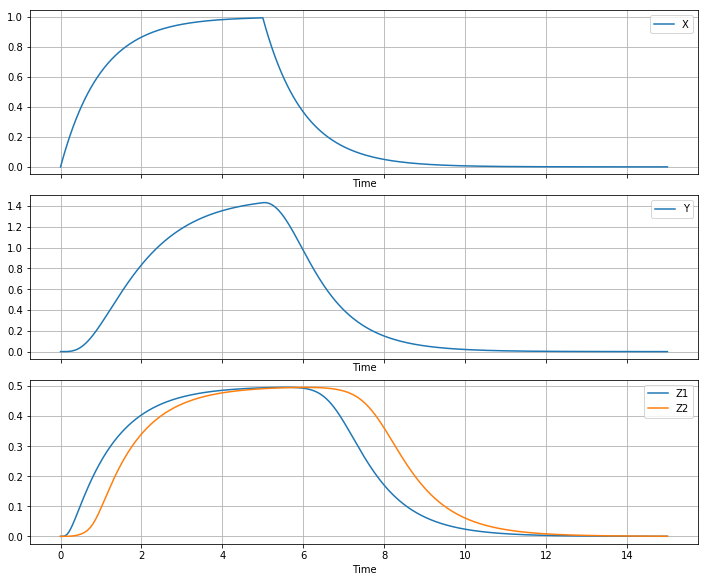

In [8]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(10,8))
fig.tight_layout()
ax[0].plot(t,ffl[:,0],label='X')
ax[1].plot(t,ffl[:,1],label='Y')
ax[2].plot(t,yt,label='Z1')
ax[2].plot(t,zt,label='Z2')
[a.grid() for a in ax]
[a.legend() for a in ax]
[a.set_xlabel('Time') for a in ax]
#plt.hlines([Kxy,Kxz1,Kxz2],0,15,linestyles='--',colors=['b','k'],label='Kxy')
plt.show()

# implementing the curcuit

In [9]:
def Hill_func(x,t,K,n,prod=True):
    if prod==True:
        return x**n/(K**n+x**n)
    else:
        return  1-(x**n/(K**n+x**n))

def dY_t(y,t,x,alphay,betaY,Kxy,nXY):
    return betaY*Hill_func(x,t,Kxy,nXY,True)-alphay*y

def dz_t_AND(z,t,x,y,alphaZ,betaZ,Kxz,nXZ,Kyz,nYZ,prod1,prod2):
    return (betaZ)*(Hill_func(x,t,Kxz,nXZ,prod1)*Hill_func(y,t,Kyz,nYZ,prod2))-alphaZ*z

In [10]:
def rate_curcuit(u,t,D,alphaY1,betaY1,alphaZ1,betaZ1,alphaX2,betaX2,alphaY2,betaY2
                 ,alphaZ2,betaZ2,alphaZ3,betaZ3,Kx1y1,nX1Y1,Kx1z1,nX1Z1,Ky1z1,nY1Z1,
                Kx1x2,nX1X2,Ky1X2,nY1X2,Kx2y2,nX2Y2,Kx2z2,nX2Z2,Ky2z2,nY2Z2,
                Kx2z3,nX2Z3,Ky2z3,nY2Z3):
    
    y1,z1,x2,y2,z2,z3 = u
    x1 = 0
    if t>D:
        x1 = 1
    
    dy1dt = dY_t(y1,t,x1,alphaY1,betaY1,Kx1y1,nX1Y1)
    dz1dt = dz_t_AND(z1,t,x1,y1,alphaZ1,betaZ1,Kx1z1,nX1Z1,Ky1z1,nY1Z1,True,False)
    dx2dt = dz_t_AND(x2,t,x1,y1,alphaX2,betaX2,Kx1x2,nX1X2,Ky1X2,nY1X2,True,True)
    dy2dt = dY_t(y2,t,x2,alphaY2,betaY2,Kx2y2,nX2Y2)
    dz2dt = dz_t_AND(z2,t,x2,y2,alphaZ2,betaZ2,Kx2z2,nX2Z2,Ky2z2,nY2Z2,True,False)
    dz3dt = dz_t_AND(z3,t,x2,y2,alphaZ3,betaZ3,Kx2z3,nX2Z3,Ky2z3,nY2Z3,True,True)
    
    return [dy1dt,dz1dt,dx2dt,dy2dt,dz2dt,dz3dt]


    

## Values initiation

In [11]:
alphaY1,betaY1,alphaZ1,betaZ1,alphaX2,betaX2,alphaY2,betaY2,alphaZ2,betaZ2,alphaZ3,betaZ3 = np.ones((12))
Kx1y1,Kx1z1,Ky1z1,Kx1x2,Ky1X2,Kx2y2,Kx2z2,Ky2z2,Kx2z3,Ky2z3 = 0.55*np.ones(10)
nX1Y1,nX1Z1,nY1Z1,nX1X2,nY1X2,nX2Y2,nX2Z2,nY2Z2,nX2Z3,nY2Z3 = 10*np.ones(10)

Kx2z3,Ky2z3 = [.5,1]
#nX2Z3,nY2Z3

In [12]:
D = 2.0
u0 = [0,0,0,0,0,0]
ffl = odeint(rate_curcuit,u0,t,args=(D,alphaY1,betaY1,alphaZ1,betaZ1,alphaX2,betaX2,alphaY2,betaY2
                 ,alphaZ2,betaZ2,alphaZ3,betaZ3,Kx1y1,nX1Y1,Kx1z1,nX1Z1,Ky1z1,nY1Z1,
                Kx1x2,nX1X2,Ky1X2,nY1X2,Kx2y2,nX2Y2,Kx2z2,nX2Z2,Ky2z2,nY2Z2,
                Kx2z3,nX2Z3,Ky2z3,nY2Z3))

Text(0.5, 0, 'Time')

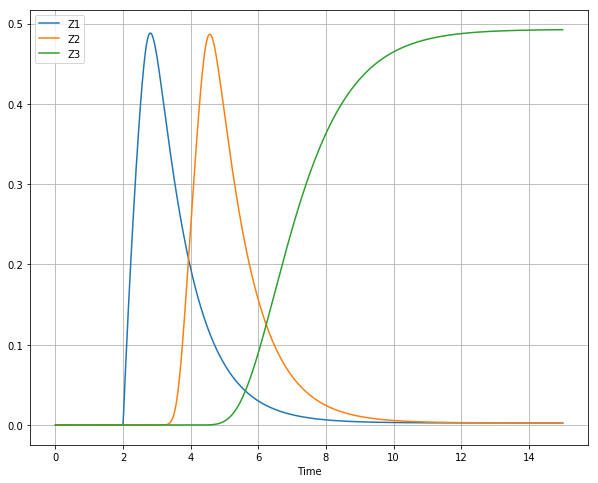

In [15]:
plt.figure(figsize=(10,8))
plt.plot(t,ffl[:,1],label='Z1')
plt.plot(t,ffl[:,4],label='Z2')
plt.plot(t,ffl[:,5],label='Z3')
plt.legend()
plt.grid()
plt.xlabel('Time')
